In [1]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from simba import simba
sb = simba()
import yt

In [2]:
# insert below the name of your output data from the light cone generator
lc_fname = 'output/halo_lightcone_001.h5'
#------------------------------------------
lc_out = sb.load_dict_from_hdf5(lc_fname)
df_lc = pd.DataFrame()
for n in lc_out.keys():
    df_lc_aux = pd.DataFrame(lc_out[n])
    df_lc_aux['Snapshot'] = [str(n)]*len(df_lc_aux)
    df_lc = pd.concat([df_lc, df_lc_aux], ignore_index=False,axis=0)
df_lc
lc_out
ma, mi= df_lc['z'].max(), df_lc['z'].min()
print(f"{mi:.3f}<=z<={ma:.3f}")

1.000<=z<=1.500


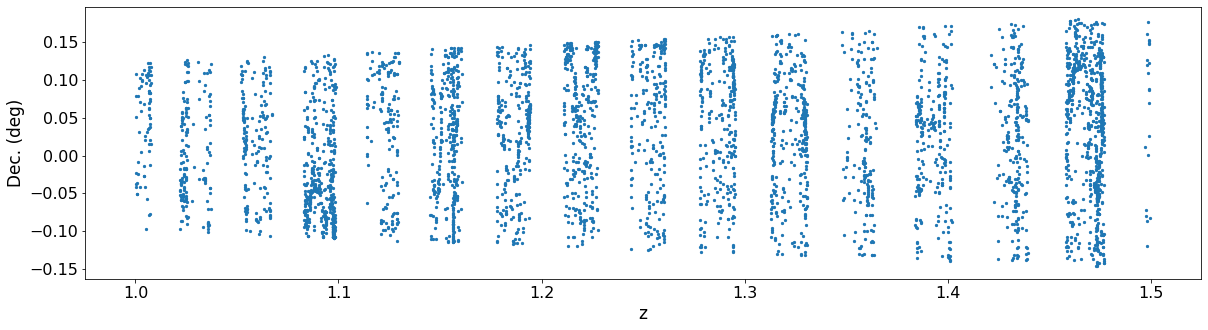

In [3]:
# plotting light cone
from cProfile import label
fig = plt.figure(figsize=(20,5))
D = df_lc['z']*np.sin(df_lc['DEC']-0.1)
plt.scatter(df_lc['z'],D,s=5)

plt.xlabel('z',size=17)
plt.ylabel('Dec. (deg)',size=17)
plt.tick_params(labelsize=16)
#plt.ylim(-0.7,1)
plt.show()